# Problem 1 - Model Predictive Control

In [2]:
%matplotlib inline

"""
Simulate Franka Panda Arm
"""

import numpy as np
from math import sin, cos, pi
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

from arm_sim import simulate_arm

# Need to reload the module to use the latest code
import robotic_arm
importlib.reload(robotic_arm)
from robotic_arm import Robot

"""
Load in the animation function
"""
# import create_animation
# importlib.reload(create_animation)
# from create_animation import create_animation

# Weights of LQR cost
weight_R = 1
weight_Q = 10
R = weight_R*np.eye(7);
Q = weight_Q*np.eye(21)
for i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20]:
# for i in [0,3,6,9,12,15,18]:
    Q[i,i] = 0
Q = np.eye(21)
Qf = Q

# End time of the simulation
tf = 16

# Construct our quadrotor controller 
robotic_arm = Robot(Q, R, Qf)

## Simulate the quadrotor using MPC as the controller


In [3]:
x0      =  np.array([0.5, 0, 0, 0, 0, 0, 0, 0, 0, -np.pi/2, 0, 0, 0, 0, 0, np.pi/2, 0, 0 , np.pi/4, 0, 0]) 
x_final =  np.array([np.pi/2, 0, 0, 0, 0, 0, 0, 0, 0, -np.pi/2, 0, 0, 0, 0, 0, np.pi/2, 0, 0 , np.pi/4, 0, 0]) 

x, u, t, loss = simulate_arm(x0, x_final, tf, robotic_arm)
# anim, fig = create_animation(x, tf)
# plt.close()
# anim

In [4]:
x

array([[ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00, ...,
         7.85398163e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  0.00000000e+00,  4.89958938e-03, ...,
         7.85398163e-01,  0.00000000e+00, -8.31730398e-19],
       [ 5.00000000e-01,  4.89958938e-05,  9.73799597e-03, ...,
         7.85398163e-01, -8.31730398e-21, -1.64000304e-18],
       ...,
       [ 1.58483519e+00,  3.87914578e-01, -1.80519504e-02, ...,
         7.85398163e-01, -4.37673036e-17,  1.16086751e-17],
       [ 1.58871434e+00,  3.87734059e-01, -1.80511980e-02, ...,
         7.85398163e-01, -4.36512168e-17,  1.16081458e-17],
       [ 1.59259168e+00,  3.87553547e-01, -1.80511980e-02, ...,
         7.85398163e-01, -4.35351354e-17,  1.16081458e-17]])

In [5]:
u

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.89958938e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.66346080e-16, -8.31730398e-17],
       [ 4.83840659e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.61654529e-16, -8.08272645e-17],
       ...,
       [ 1.33311041e-04,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.07781255e-19, -1.03890627e-19],
       [ 7.52353596e-05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.05852434e-19, -5.29262167e-20],
       [ 3.46134207e-16,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.45175590e-31, -2.22587794e-31]])

In [6]:
t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

Text(0.5, 1.0, 'Loss Distance between the Goal point and MPC Prediction over N Time steps')

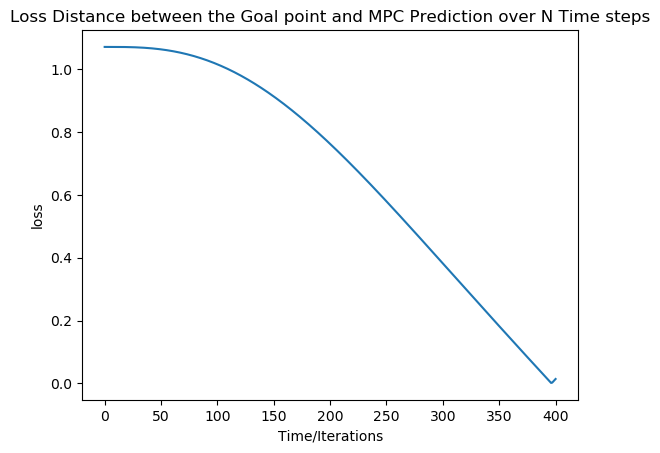

In [9]:
plt.plot(loss)
plt.xlabel('Time/Iterations')
plt.ylabel('loss')
plt.title("Loss Distance between the Goal point and MPC Prediction over N Time steps")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a946460-7849-4422-942f-5a0cbbeecd65' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>